**By: Nathan Burns**    


# The World Happiness Report: *An Exploratory Data Analysis Project*
## Introduction

As a global civilization, we are awakening to the realization of just how much happiness in our day-to-day lives really matters. The positive effects of a happy mind not only propagate throughout the various dimensions of a person's life, but they furthermore ripple throughout society in a stone-in-the-pond fashion. Corporations, governments and organizations are becoming increasingly aware that its employees, citizens and members are better able to contribute to their respective tasks when minimum happiness levels are met, and that it is therefore in their best interests to contribute to the well-beings of these people. As a result, happiness metrics are becoming increasingly utilized in making policy decisions - a win for everyone.

In 2012 the first iteration of the World Happiness Report was produced, a survey that looks at nationally representative happiness levels across countries as a measure of national progress. It was an impressive feat that required the contributions of leading experts in fields such as statistics, data science, economics, health, psychology and public policy, among many others. To evaluate happiness levels, the report used surveys provided by the Gallup World Poll, the gold standard of worldwide polling. More specifically, happiness scores are based on the Cantril Ladder, a subjective metric that asks each participant to evaluate his or her quality of life on a scale from 0 to 10, with 10 being the dream life. The poll furthermore includes geographical data and data for six characteristics that are hypothesized to be correlated with national happiness levels; it is these features and how they relate to happiness that will be the main focus of this project. Since 2012 a new updated report has been published each year excluding 2014, and in this project we will look specifically at the years 2015-2017.

**Credits:** The data from the World Happiness Report was borrowed from a reviewed Kaggle Kernel of the same name. Although this dataset is relatively clean in isolation, once merged with the second dataset of this project (world map data), further cleaning will be necessary.

**THE SIX CHARACTERISTICS**

The values for these features are to be understood as ratings for each of the characteristics, not the true values for the characteristics, with higher values corresponding to countries that are more favorable in those characteristics.

1) GDP per capita <br />
2) Family quality of citizens <br />
3) Health of citizens <br />
4) Freedom of citizens <br />
5) Generosity of citizens <br />
6) Trust in government of citizens <br />

**THE TARGET**

The mean happiness score of each country

**THE CONVENTIONS**

• Dystopia is a hypothetical nation where happiness levels are lower than they are in any other country: 2.10, 2.33 and 1.85 out of 10 in 2015, 2016 and 2017 respectively. The purpose of defining Dystopia is to provide a baseline against which the other nations can be compared. <br /> 
• Dystopia is defined to have the minimum value for each of the characteristics, which by convention is 0. <br />
• Each characteristic represents how much more value that characteristic contributes to the happiness score (0-10) of a nation than it does for Dystopia. The values are always in the interval [0,2]. <br />
• An estimate for the happiness score of a nation in a given year is found by summing the Dystopia happiness score of that year with the six characteristics of the nation in that year.

**THE GOAL**

This is an EDA project. However, the data is split into a training set and a test set and suggestions for what changes could be made in order to use the analysis in a machine learning problem are provided along the way.

## Exploratory Data Analysis

While exploring the data, appropriate changes will be made as the needs for them are found. After we have cleaned the data as best as possible we will then move on to descriptive analytics to further analyze the data.

### EDA Part 1: *Data Preparation* 


**Introducing The World Happiness Report Data**

We will begin by loading the relevant libraries and the three World Happiness Report datasets, one for each year in 2015-2017. <br \>  (For organizational purposes we will now also load the world map dataset that will soon be used.)

In [953]:
#Load the libraries
library(ggplot2)
library(ggmap)
library(maps)
library(FSelector)   #For information.gain()
library(gridExtra)   #For grid.arrange()
library(ggthemes)    #For theme_few()

#load the data
whr2015=read.csv("2015.csv") 
whr2016=read.csv("2016.csv") 
whr2017=read.csv("2017.csv")
map = map_data("world")

To get an idea of what data we have access to we can inspect each of the datasets.

In [954]:
#Inspect the data
#2015 data
str(whr2015)

'data.frame':	158 obs. of  12 variables:
 $ Country                      : Factor w/ 158 levels "Afghanistan",..: 136 59 38 106 25 46 100 135 101 7 ...
 $ Region                       : Factor w/ 10 levels "Australia and New Zealand",..: 10 10 10 10 6 10 10 10 1 1 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.59 7.56 7.53 7.52 7.43 ...
 $ Standard.Error               : num  0.0341 0.0488 0.0333 0.0388 0.0355 ...
 $ Economy..GDP.per.Capita.     : num  1.4 1.3 1.33 1.46 1.33 ...
 $ Family                       : num  1.35 1.4 1.36 1.33 1.32 ...
 $ Health..Life.Expectancy.     : num  0.941 0.948 0.875 0.885 0.906 ...
 $ Freedom                      : num  0.666 0.629 0.649 0.67 0.633 ...
 $ Trust..Government.Corruption.: num  0.42 0.141 0.484 0.365 0.33 ...
 $ Generosity                   : num  0.297 0.436 0.341 0.347 0.458 ...
 $ Dystopia.Residual            : num  2.52 2.7 2.49 2.47 2.45 ...


In [955]:
#2016 data
str(whr2016)

'data.frame':	157 obs. of  13 variables:
 $ Country                      : Factor w/ 157 levels "Afghanistan",..: 38 135 58 104 45 26 98 99 7 134 ...
 $ Region                       : Factor w/ 10 levels "Australia and New Zealand",..: 10 10 10 10 10 6 10 1 1 10 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.53 7.51 7.5 7.5 7.41 ...
 $ Lower.Confidence.Interval    : num  7.46 7.43 7.33 7.42 7.35 ...
 $ Upper.Confidence.Interval    : num  7.59 7.59 7.67 7.58 7.47 ...
 $ Economy..GDP.per.Capita.     : num  1.44 1.53 1.43 1.58 1.41 ...
 $ Family                       : num  1.16 1.15 1.18 1.13 1.13 ...
 $ Health..Life.Expectancy.     : num  0.795 0.863 0.867 0.796 0.811 ...
 $ Freedom                      : num  0.579 0.586 0.566 0.596 0.571 ...
 $ Trust..Government.Corruption.: num  0.445 0.412 0.15 0.358 0.41 ...
 $ Generosity                   : num  0.362 0.281 0.477 0.379 0.255 ...
 $ Dystopia.Residual            : num  2.

In [956]:
#2017 data
str(whr2017)

'data.frame':	155 obs. of  12 variables:
 $ Country                      : Factor w/ 155 levels "Afghanistan",..: 105 38 58 133 45 99 26 100 132 7 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.54 7.52 7.5 7.49 7.47 ...
 $ Whisker.high                 : num  7.59 7.58 7.62 7.56 7.53 ...
 $ Whisker.low                  : num  7.48 7.46 7.39 7.43 7.41 ...
 $ Economy..GDP.per.Capita.     : num  1.62 1.48 1.48 1.56 1.44 ...
 $ Family                       : num  1.53 1.55 1.61 1.52 1.54 ...
 $ Health..Life.Expectancy.     : num  0.797 0.793 0.834 0.858 0.809 ...
 $ Freedom                      : num  0.635 0.626 0.627 0.62 0.618 ...
 $ Generosity                   : num  0.362 0.355 0.476 0.291 0.245 ...
 $ Trust..Government.Corruption.: num  0.316 0.401 0.154 0.367 0.383 ...
 $ Dystopia.Residual            : num  2.28 2.31 2.32 2.28 2.43 ...


In looking at the above datasets, notice that *whr2015*, *whr2016* and *whr2017* do not have a year variable, which we will add so that the observations can be distinguished from one another when these datasets are joined. Furthermore, the feature sets are not the same for these datasets: *Standard.Error* is unique to *whr2015*, *Lower.Confidence.Interval* and *Upper.Confidence.Interval* are unique to *whr2016*, and *Whisker.high* and *Whisker.low* are unique to *whr2017*. We will remove these variables so that these datasets can be more readily joined, and because they are not relevant for the purposes of this project.

In [957]:
#Add year feature
whr2015$year=2015
whr2016$year=2016
whr2017$year=2017

#Eliminate irrelevant features
whr2015$Standard.Error=NULL
whr2016$Lower.Confidence.Interval=NULL
whr2016$Upper.Confidence.Interval=NULL
whr2017$Whisker.high=NULL
whr2017$Whisker.low=NULL

Notice furthermore that *whr2017* does not have the *Region* variable. Let's temporarily drop *Region* from *whr2015* and *whr2016* so that we can combine *whr2015*, *whr2016* and *whr2017* into a single dataset called *whr*.

In [958]:
region2015=whr2015$Region #Save whr2015$Region into a variable so that we can add this information back in in a moment
regionLevels=levels(whr2015$Region) #Save the region levels as names because they will be temporarily be converted to numerical form, which we will want to change back

whr2015$Region=NULL       #Temporarily drop whr2015$Region

region2016=whr2016$Region #Save whr2016$Region into a variable so that we can add this information back in in a moment
whr2016$Region=NULL       #Temporarily drop whr2016$Region

whr = rbind(whr2015,whr2016,whr2017)   #We can bind the rows because these three datasets now have the same feature sets

Next we will modify *whr* for aesthetic reasons, add the 2015 and 2016 region data back in, and finally impute the 2017 *region* data using the 2015 *region* data.

In [959]:
#Modify the presentation of whr
colnames(whr) = c("country", "rank", "h.score", "gdp", "family", "health", "freedom", "govt", "generosity", "residual", "year")   #Give the features more reader-friendly names
whr=whr[,c(11,1:3,10,4:9)]   #Rearrange the features in a more reader-friendly order

#Add the 2015 and 2016 region data back in
whr$region=rep(999,470)    #Recreate the region variable in whr; the 470 values between 2015, 2016 and 2017 are initialized as 999 but will be changed in a moment

whr$region[1:315]=c(region2015,region2016)   #For the 315 values between 2015 and 2016 replace them with the original region values stored above

#Impute the 2017 region data (observations 316 to 470 in whr)
for (i in 316:470) {country=whr$country[i]; j=which(whr$country==country)[1]; whr$region[i]=whr$region[j]}

When we inspect *region* we see that some of the values corresponding to the observations in *whr* were not updated from their initialization values of 999.

In [960]:
which(whr$region==999)

[1] 348 386

Why might that be? Let's manually inspect why the 2017 regions for these points were not added.

In [961]:
#These two observations occurs in 2017
whr$country[348]   
whr$country[386]

whr2015$Country[38]
whr2015$Country[72]

[1] Taiwan Province of China
166 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Taiwan Province of China

[1] Hong Kong S.A.R., China
166 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Taiwan Province of China

[1] Taiwan
158 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Zimbabwe

[1] Hong Kong
158 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Zimbabwe

We see that these country names are not exactly the same in *whr2015*, and *whr2017*, hence the two 999 values that remained. 
We will first convert the names to 'Taiwan' and 'Hong Kong'.

In [962]:
whr$country[c(348,386)] = c("Taiwan","Hong Kong")

Next we will **impute** the corresponding regions using the regions for Taiwan and Hong Kong in *whr2015*.

In [963]:
#We will momentarily read the regions as numbers, which is the current form of the region variable in whr
as.numeric(region2015[c(38,72)])

[1] 3 3

In [964]:
whr$region[c(348,386)]=3

Now we can convert the regions back from numbers to their original names.

In [965]:
whr$region=as.factor(whr$region)   #Before this command this variable is numerical
levels(whr$region) = regionLevels  #Convert the levels from numbers back to their original names ("Western Europe", etc.) 

whr$region = factor(whr$region)    #Get rid of the extra (now-empty) level that corresponded to the 999 values

Furthermore, in looking through the region levels we see that both 'Somaliland region' and 'Somaliland Region' occur in *whr*.

In [966]:
whr$country[91]
whr$country[255]

[1] Somaliland region
166 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Taiwan Province of China

[1] Somaliland Region
166 Levels: Afghanistan Albania Algeria Angola Argentina Armenia ... Taiwan Province of China

It is fair to assume that these are the same region, and so only one version of the name should exist. We will keep the 'Somaliland Region' version.

In [967]:
whr$country[91]="Somaliland Region"

#### Introducing The World Map Data

Now that we've done some cleaning on the main dataset of this project it's time to introduce the second dataset that will be used. Eventually we will merge these two datasets so that we can obtain a visualization of national happiness levels using a world map.

In [968]:
#World map data
str(map)

'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


Notice that the country variable in map is called *region* and is in string format. To be be consistent with *whr* so that we can eventually merge the two, we will fix this.

In [969]:
colnames(map)[5]="country"
map$country = as.factor(map$country)
map$subregion=NULL  #We don't need this variable for this problem

Let's take a look at which countries occur in *whr* but not in *map*.

In [970]:
which(!(levels(whr$country)%in%levels(map$country)))

[1]  32  33  57 105 109 127 143 150 151 163 165 166

In [971]:
levels(whr$country)[c(32,33,57,105,109,127,143,150,151,163,165,166)]

[1] "Congo (Brazzaville)"      "Congo (Kinshasa)"        
 [3] "Hong Kong"                "North Cyprus"            
 [5] "Palestinian Territories"  "Somaliland region"       
 [7] "Trinidad and Tobago"      "United Kingdom"          
 [9] "United States"            "Somaliland Region"       
[11] "Hong Kong S.A.R., China"  "Taiwan Province of China"

These country levels from *whr* fail to appear in *map* for two reasons: 

i) *They are written differently between the two datasets* <br />
ii) *They fail to appear in map altogether*

###### The countries in whr that are written differently in map

In [972]:
w1= which(levels(whr$country)=="Congo (Brazzaville)")
w2= which(levels(whr$country)=="Palestinian Territories")
w3= which(levels(whr$country)=="United Kingdom")
w4= which(levels(whr$country)=="United States")
w5= which(levels(whr$country)=="Taiwan Province of China")
c(w1,w2,w3,w4,w5)

[1]  32 109 150 151 166

In looking through *map* we see that the above countries are written as seen below. We will update the country names from *whr* to match those in *map*.

In [973]:
#Update level names
levels(whr$country)[32]="Democratic Republic of the Congo" #Also known as Congo (Brazzaville)
levels(whr$country)[109]="Palestine"
levels(whr$country)[150]="UK"
levels(whr$country)[151]="USA"
levels(whr$country)[166]="Taiwan"

###### The countries in whr that fail to appear in map altogether

We have already taken care of the 'Hong Kong S.A.R., China' and 'Taiwan Province of China' levels; they are now empty levels in *whr* that require no further attention. Now we must handle the levels in *whr* that do not appear in *map*: 'Congo (Kinshasa)', 'North Cyprus', 'Hong Kong', 'Somaliland Region' and 'Trinidad and Tobago'. Fortunately this is a small list, and these countries are geographically small, so we can remove them without having much of a negative effect on the aesthetics of the world map that is to come.

For the specific case of 'Trinidad and Tobago', note that the *map* dataset treats these as two different countries, 'Trinidad' and 'Tobago'. We will remove 'Trinidad and Tobago' from *whr* but we will impute values for 'Trinidad' and 'Tobago' in *map* using the 'Trinidad and Tobago' values from *whr*.

In [974]:
#Identifying the observations that need to be removed
which(whr$country=="Congo (Kinshasa)")
which(whr$country=="North Cyprus") 
which(whr$country=="Hong Kong") 
which(whr$country=="Somaliland Region") 
which(whr$country=="Trinidad and Tobago")   #Before we remove these observations we extract the mean happiness rating

[1] 120 283 441

[1]  66 220 376

[1]  72 233 386

[1]  91 255

[1]  41 201 353

In [975]:
#Identifying the happiness score of Trinidad and Tobago in whr for 2015, 2016 and 2017
c(whr$h.score[41], whr$h.score[201], whr$h.score[353])

[1] 6.168 6.168 6.168

That was unexpected: the happiness score for Trinidad and Tobago in *whr* was the same in 2015, 2016 and 2017. Let's take a quick look at two other countries that are geographically close to Trinidad and Tobago: Venezuela and Suriname.

In [976]:
which(whr$country=="Venezuela")   #The observations in 2015-2017 corresponding to Venezuela
which(whr$country=="Suriname")    #The observations in 2015-2016 corresponding to Suriname; 2017 is missing

[1]  23 202 397

[1]  40 198

In [977]:
round(c(whr$h.score[23], whr$h.score[202], whr$h.score[397]),2)
round(c(whr$h.score[40], whr$h.score[198]),2)

[1] 6.81 6.08 5.25

[1] 6.27 6.27

We see that the happiness levels in Venezuela and Suriname are comparable to those in Trinidad and Tobago, which is encouraging. Furthermore, we see that the 2015 and 2016 happiness scores in Suriname are the same. It is likely that the organizers of this dataset imputed some happiness ratings for example by taking a mean or by duplicating one year's value for the other year(s). 

Now we can remove the unwanted observations.

In [978]:
whr=whr[-c(120,283,441,66,220,376,41,201,353,72,233,386,91,255),]   #Remove the undesired rows
whr$country = factor(whr$country)                                   #Remove empty factors from whr$country
whr = whr[,c(1:2,12,3:11)]                                          #Rearrange columns of whr to make it more reader-friendly

**Merge The Data**

We will perform an SQL-style left-join between *map* and *whr*; that is, we will merge the datasets in such a way that all of the information from *map* is retained. We do this so that we can make a world map visualization without holes in it corresponding to missing countries.

In [979]:
merge = merge(map,whr,by="country", all.x=TRUE) 
merge = merge[order(merge$order),]   #merge must be ordered by the order variable so that the map will be drawn appropriately


Let's **impute** the happiness score for both *Trinidad* and *Tobago* using 6.168.

In [980]:
merge$h.score[merge$country=="Trinidad"] = 6.168
merge$h.score[merge$country=="Tobago"] = 6.168

Let's quickly verify that there are no missing countries in this new dataset.

In [981]:
sum(is.na(merge$country))

[1] 0

This means that our *whr* and *map* datasets have been successfully joined in such a way that no missing values for countries occur in *merge*, as desired. This dataset will be used in the bivariate analysis section to create a world map that colors countries according to their happiness levels.

**Split The Data: *train* And *test***

For now let's return to the *whr* dataset so that we can group the data by year. A training set will be created by combining the 2015 and 2016 data, while the 2017 data will be preserved for the test set.

In [982]:
whr2015=subset(whr,year==2015)
whr2016=subset(whr,year==2016)
whr2017=subset(whr,year==2017)

train=rbind(whr2015,whr2016)
test=whr2017

**Train**

Before moving onto the second part of the EDA section let's quickly remind ourselves of how the training set currently looks.

In [983]:
str(train)

'data.frame':	305 obs. of  12 variables:
 $ year      : num  2015 2015 2015 2015 2015 ...
 $ country   : Factor w/ 158 levels "Afghanistan",..: 132 57 37 103 25 45 98 131 99 7 ...
 $ region    : Factor w/ 10 levels "Australia and New Zealand",..: 10 10 10 10 6 10 10 10 1 1 ...
 $ rank      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ h.score   : num  7.59 7.56 7.53 7.52 7.43 ...
 $ residual  : num  2.52 2.7 2.49 2.47 2.45 ...
 $ gdp       : num  1.4 1.3 1.33 1.46 1.33 ...
 $ family    : num  1.35 1.4 1.36 1.33 1.32 ...
 $ health    : num  0.941 0.948 0.875 0.885 0.906 ...
 $ freedom   : num  0.666 0.629 0.649 0.67 0.633 ...
 $ govt      : num  0.42 0.141 0.484 0.365 0.33 ...
 $ generosity: num  0.297 0.436 0.341 0.347 0.458 ...


In the upcoming sections of this project we can refer to the output above any time we are dealing with train. This concludes the first part of the explanatory data analysis section, and we are now ready to move on to the second part.

### EDA Part 2: *Descriptive Analytics*

This part can be divided into three sections that will be explored independently:

   i)   **Univariate Analysis** <br />
   ii)  **Bivariate Analysis** <br />
   iii) **Multivariate Analysis**
   
Each section will furthermore be divided into two subsections to accomodate the fact that there are two types of features:  

   i)  ***Region*** (categorical) <br /> 
   ii) ***The Six Characteristics*** (numerical)

**Univariate Analysis: *Region***

Let's see how many observations there are in each region.

In [984]:
table(train$region)


      Australia and New Zealand      Central and Eastern Europe 
                              4                              58 
                   Eastern Asia     Latin America and Caribbean 
                             10                              44 
Middle East and Northern Africa                   North America 
                             39                               4 
              Southeastern Asia                   Southern Asia 
                             18                              14 
             Sub-Saharan Africa                  Western Europe 
                             74                              40 

*Note: this table includes data from both 2015 and 2016, hence why there are for example 4 observations in 'Australia and New Zealand' and not 2.

Unsurprisingly, the number of countries in each region varies widely. It will be of value to keep this detail in mind in the bivariate section, where boxplots representing national happiness levels by region will be displayed.

**Univariate Analysis: *The Six Characteristics***

Let's first plot these characteristics to get an idea of the distributions of the features, as well as to see whether or not there is some kind of ordering among each characteristic.

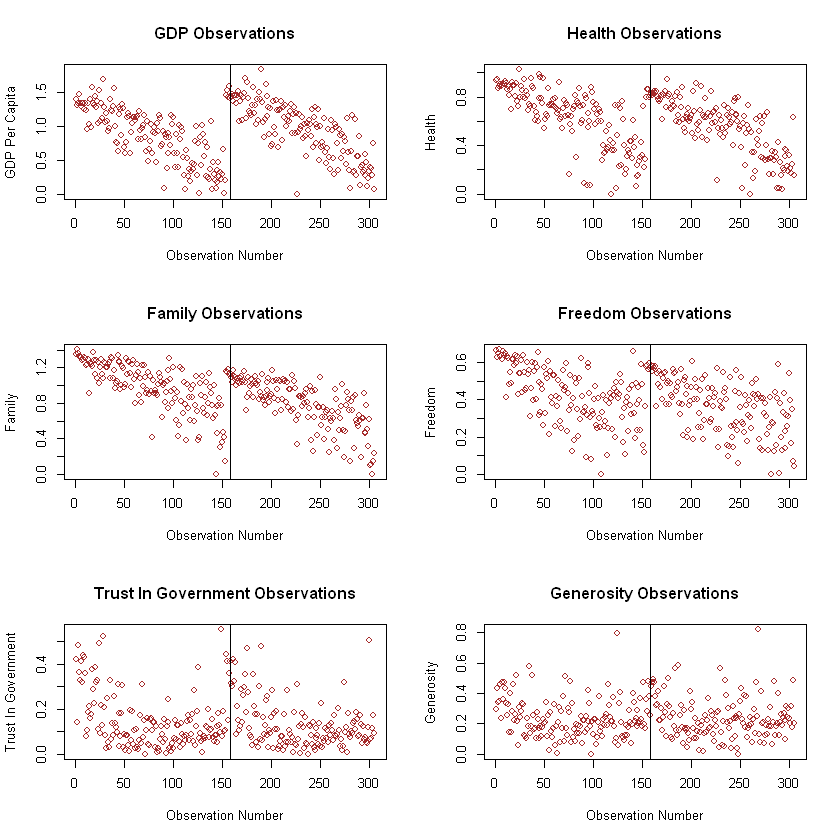

In [999]:
par(mfrow=c(3,2)) #This allows 6 plots in base R to be plotted simultaneously in a 3x2 manner

plot(train$gdp, xlab="Observation Number", ylab="GDP Per Capita", main="GDP Observations", col="brown")
abline(v=157.5) #The first 157 rows in train are for year 2015; the next 158 rows are for year 2016. We add a line to each plot to separate these points

plot(train$health, xlab="Observation Number", ylab="Health", main="Health Observations", col="brown")
abline(v=157.5)

plot(train$family, xlab="Observation Number", ylab="Family", main="Family Observations", col="brown")
abline(v=157.5)

plot(train$freedom, xlab="Observation Number", ylab="Freedom", main="Freedom Observations", col="brown")
abline(v=157.5)

plot(train$govt, xlab="Observation Number", ylab="Trust In Government", main="Trust In Government Observations", col="brown")
abline(v=157.5)

plot(train$generosity, xlab="Observation Number", ylab="Generosity", main="Generosity Observations", col="brown")
abline(v=157.5)

Notice that each plot can be divided into two similar-looking plots that have been separated by a vertical line. This is because *train* is ordered by year, the data in each year is ordered by happiness scores, and the data doesn't change much from one year to the next. We might consider randomizing this order when applying machine learning.

**Summary statistics** for the six characteristics can be computed.

In [986]:
summary = matrix(rep(0,42), nrow=6)   #6x7 matrix of 0's for initialization; 1 row for each characteristic, 1 column for each summary statistic
summary[1,] = c(as.numeric(summary(train$gdp)),sd(train$gdp)) #The first row of summary are the summary statistics of gdp
summary[2,] = c(as.numeric(summary(train$health)),sd(train$health))
summary[3,] = c(as.numeric(summary(train$family)),sd(train$family))
summary[4,] = c(as.numeric(summary(train$freedom)),sd(train$freedom))
summary[5,] = c(as.numeric(summary(train$govt)),sd(train$govt))
summary[6,] = c(as.numeric(summary(train$generosity)),sd(train$generosity))
summary = as.data.frame(summary)
colnames(summary) = c("Min", "Q1", "Q2", "Mean", "Q3", "Max", "SD") #Rename the columns to a more reader-friendly format
summary = summary[,c(1,6,2,3,5,4,7)] #Display the 7 stats in a more reader-friendly order.
rownames(summary) = c("GDP", "Health", "Family", "Freedom", "Government", "Generosity") #Rename the rows to a more reader-friendly format
summary = round(summary,2)
summary

,Min,Max,Q1,Q2,Q3,Mean,SD
GDP,0,1.82,0.60,0.97,1.22,0.90,0.40
Health,0,1.03,0.42,0.64,0.78,0.59,0.24
Family,0,1.40,0.72,0.93,1.09,0.89,0.29
Freedom,0,0.67,0.30,0.41,0.52,0.40,0.15
Government,0,0.55,0.06,0.11,0.18,0.14,0.11
Generosity,0,0.82,0.15,0.22,0.30,0.24,0.13


At a quick glance it might look suspicious that the minimum value for each of the six characteristics is 0. However, it is important to remember that these values correspond to the values in Dystopia, which by convention were chosen to be 0, so there is no problem here.

Let's now take a look at the **histogram** for each of the six characteristics.

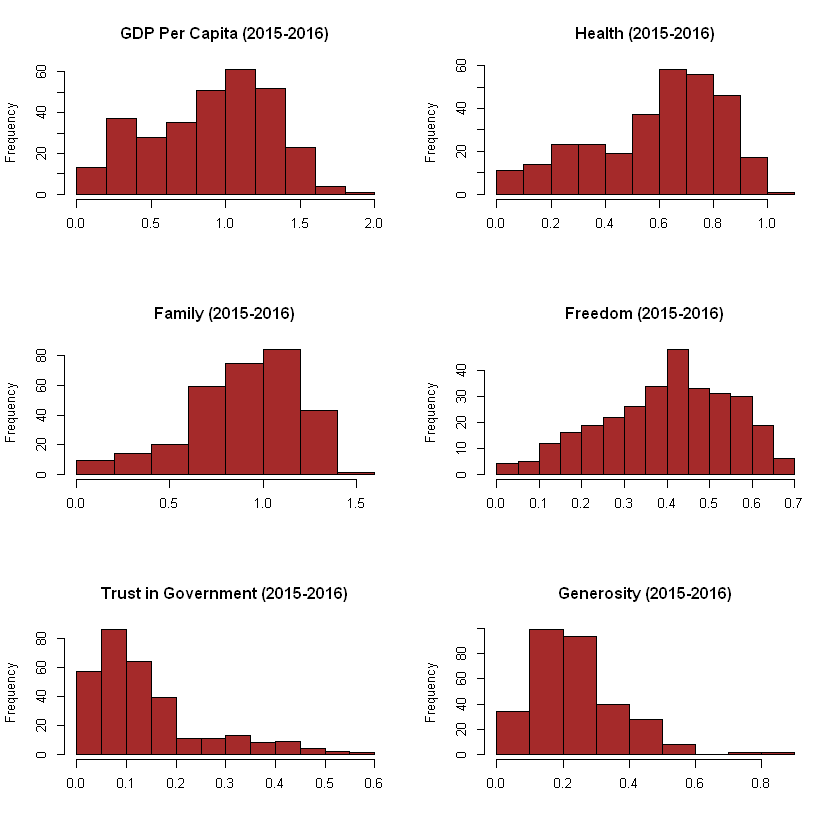

In [987]:
par(mfrow=c(3,2))

hist(train$gdp, xlab=NULL, main="GDP Per Capita (2015-2016)", col="brown")
hist(train$health, xlab=NULL, main="Health (2015-2016)", col="brown")
hist(train$family, xlab=NULL, main="Family (2015-2016)", col="brown")
hist(train$freedom, xlab=NULL, main="Freedom (2015-2016)", col="brown")
hist(train$govt, xlab=NULL, main="Trust In Government (2015-2016)", col="brown")
hist(train$generosity, xlab=NULL,main="Generosity (2015-2016)", col="brown")

We see that the features are somewhat Gaussian, although most are skewed. For this reason it would be a good idea when applying machine learning to apply Box-Cox transformations to these variables.

**Bivariate Analysis: *Happiness Vs. Region***

To get a general idea of how happiness looks in each region we can start by creating **boxplots**.

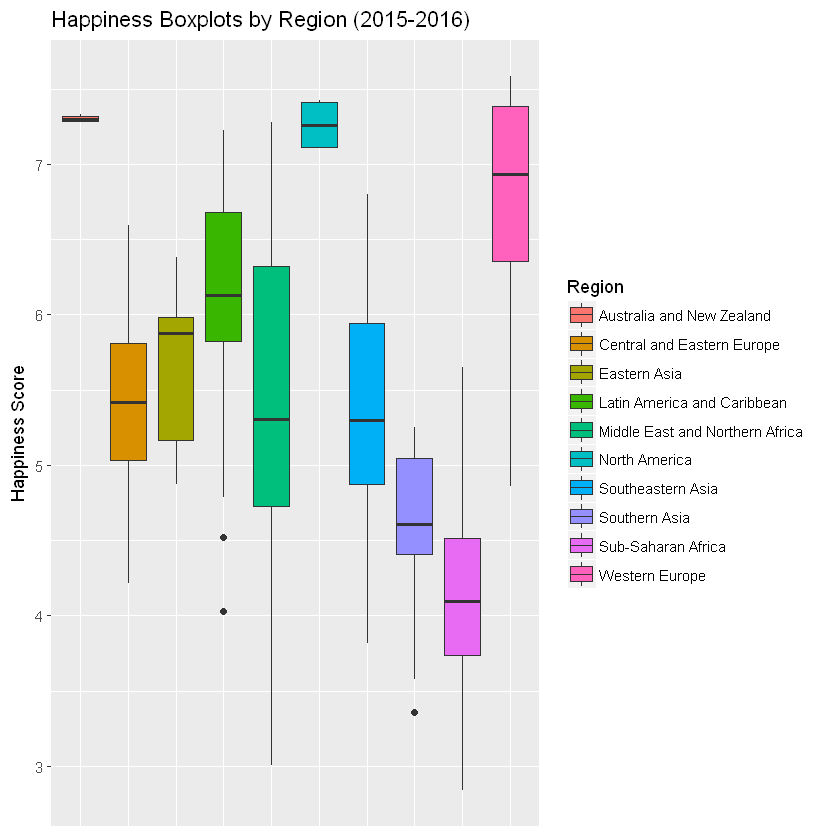

In [988]:
ggplot(train, aes(y=h.score, x=region, fill=region)) + geom_boxplot() + labs(title="Happiness Boxplots By Region (2015-2016)", y="Happiness Score") + theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank()) + scale_fill_discrete(name="Region") 
#Boxplot of happiness scores grouped by region

People in Australia and New Zealand, North America and Western Europe report having the highest happiness levels. These regions correspond to the most developed parts of the world, so there is not much surprise here. On the other hand people in Sub-Saharan Africa and Southern Asia are the least happy people, and these regions correspond to the least developed parts of the world, so again - there is not much surprise here. Returning to the univariate section, some of these boxplots are constructed from small sample sizes (e.g. 'Australia and New Zealand' has a sample size of only 4). Therefore, if building predictive models by geography it would likely be a better idea to make predictions based on individual countries in such regions rather than on their geographical regions themselves.

To better visualize how happiness scores vary from country to country we are now ready to look at a **world map**.

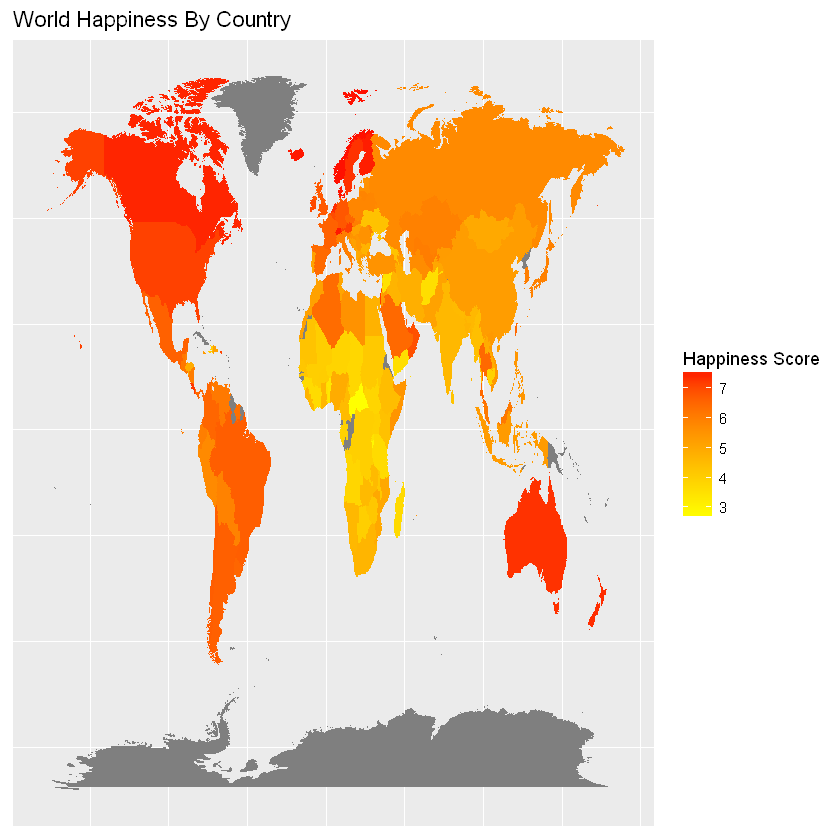

In [997]:
ggplot(merge,aes(x=long,y=lat,group=group,fill=h.score)) + geom_polygon() + scale_fill_gradient(high="red", low="yellow", name="Happiness Score") + theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank()) + labs(title="World Happiness By Country")

**Grey areas correspond to countries with missing data from merge. Darker colored areas correspond to happier countries.*

Once again we can see that the more developed regions of the world - North America in the top left, Australia and New Zealand in the bottom right and Western Europe in the top middle - are darker in the above heat map. Meanwhile endemic poverty in Africa and Southern Asia result in their corresponding parts of the map being of a lighter color.

**Bivariate Analysis: *Happiness Vs. The Characteristics***

We will start by creating the **line of best fit** between each characteristic and the happiness score so that we can extract the equation of the line of best fit and R-squared value.

In [990]:
#Create the lines of best fit and keep their summaries.
lm.gdp.summary = summary(lm(h.score~gdp, data=train))
lm.health.summary = summary(lm(h.score~health, data=train))
lm.family.summary = summary(lm(h.score~family, data=train))
lm.freedom.summary = summary(lm(h.score~freedom, data=train))
lm.govt.summary = summary(lm(h.score~govt, data=train))
lm.generosity.summary = summary(lm(h.score~generosity, data=train))

#Extract the coefficients for the lines of best fit
#First the constant coefficient
b0 = lm.gdp.summary$coefficients[1,1]
b0[2] = lm.health.summary$coefficients[1,1]
b0[3] = lm.family.summary$coefficients[1,1]
b0[4] = lm.freedom.summary$coefficients[1,1]
b0[5] = lm.govt.summary$coefficients[1,1]
b0[6] = lm.generosity.summary$coefficients[1,1]
b0 = round(b0,2)

#Second the feature coefficient
b1 = lm.gdp.summary$coefficients[2,1]
b1[2] = lm.health.summary$coefficients[2,1]
b1[3] = lm.family.summary$coefficients[2,1]
b1[4] = lm.freedom.summary$coefficients[2,1]
b1[5] = lm.govt.summary$coefficients[2,1]
b1[6] = lm.generosity.summary$coefficients[2,1]
b1 = round(b1,2)

#Write the equations as strings so they can be added to ggplot
eqn = paste0("y=",b0[1],"+",b1[1])
eqn[2] = paste0("y=",b0[2],"+",b1[2])
eqn[3] = paste0("y=",b0[3],"+",b1[3])
eqn[4] = paste0("y=",b0[4],"+",b1[4])
eqn[5] = paste0("y=",b0[5],"+",b1[5])
eqn[6] = paste0("y=",b0[6],"+",b1[6])

#Extract the R-squared values
R2 = lm.gdp.summary$r.squared
R2[2] = lm.health.summary$r.squared
R2[3] = lm.family.summary$r.squared
R2[4] = lm.freedom.summary$r.squared
R2[5] = lm.govt.summary$r.squared
R2[6] = lm.generosity.summary$r.squared
R2 = round(R2,3)

Let's furthermore add in **feature importances** according to entropy, which capture how relevant each feature is in predicting the target variable.

In [991]:
weights=information.gain(h.score~gdp+family+health+freedom+govt+generosity+region,data=train)
weights=(round(weights,4))
weights$Feature = c("GDP Per Capita", "Family Quality", "Health Quality", "Freedom", "Trust in Government", "Generosity", "Region")
colnames(weights)[1]="Importance"
weights = weights[,c(2,1)]
weights = weights[order(-weights$Importance),] #Order the rows by decreasing order of importance of the features.
rownames(weights)=NULL

weights

Feature,Importance
GDP Per Capita,0.4865
Region,0.4853
Health Quality,0.4649
Family Quality,0.2107
Freedom,0.1638
Trust in Government,0.1379
Generosity,0.0635


We have already seen that a country's geographical region has a large impact on quality of life. It comes as no shock that GDP and health are also among the most important predictors of happiness; a high GDP suggests that basic financial needs are met for a large percentage of citizens, and good health allows people to better enjoy the present while being able to more optimistically plan for the future.

Now we are ready to build the **scatterplots** that compare the six characteristics to happiness ratings.

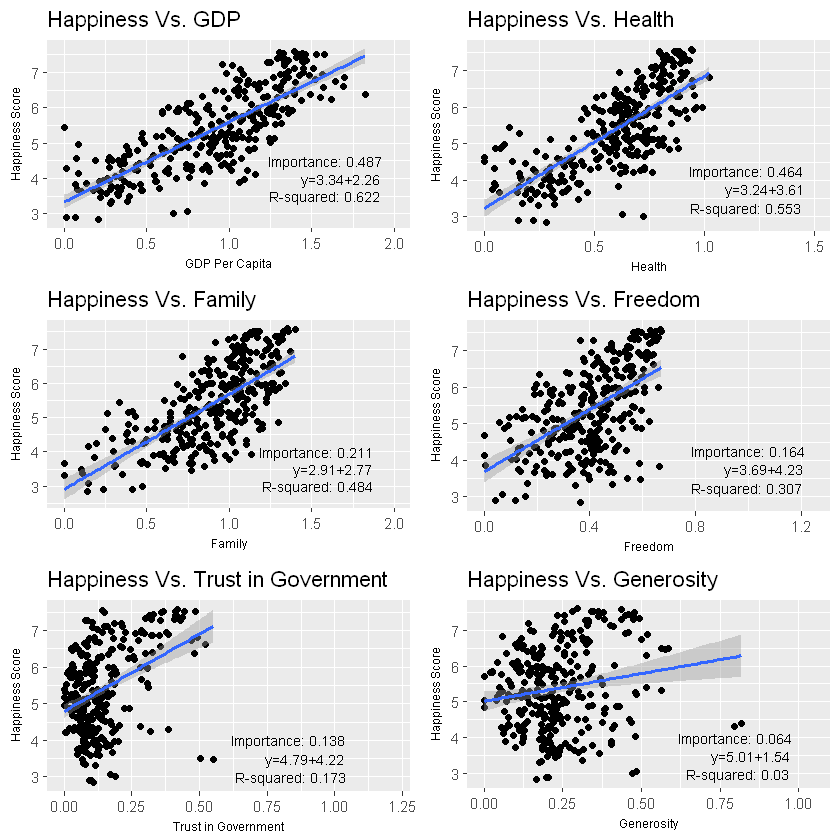

In [992]:
#Create the plots with the equation of the line of best fit, R-squared and feature importance displayed.
plot.gdp = ggplot(train, aes(x=gdp,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[1], x=1.68, y=4, size=3) + annotate("text", label=paste("R-squared:",R2[1]), x=1.58, y=3.5, size=3) + annotate("text", label="Importance: 0.487", x=1.58, y=4.5, size=3) +  scale_x_continuous(lim=c(0,2)) + labs(x="GDP Per Capita", y="Happiness Score", title="Happiness Vs. GDP") + theme(axis.title=element_text(size=7))

plot.health = ggplot(train, aes(x=health,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[2], x=1.28, y=3.75, size=3) + annotate("text", label=paste("R-squared:",R2[2]), x=1.19, y=3.25, size=3)  + annotate("text", label="Importance: 0.464", x=1.19, y=4.25, size=3) + scale_x_continuous(lim=c(0,1.5)) + labs(x="Health", y="Happiness Score", title="Happiness Vs. Health") + theme(axis.title=element_text(size=7))

plot.family = ggplot(train, aes(x=family,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[3], x=1.63, y=3.5, size=3) + annotate("text", label=paste("R-squared:",R2[3]), x=1.54, y=3, size=3) + annotate("text",label="Importance: 0.211", x=1.53, y=4, size=3) + scale_x_continuous(lim=c(0,2)) + labs(x="Family", y="Happiness Score", title="Happiness Vs. Family") + theme(axis.title=element_text(size=7))

plot.freedom = ggplot(train, aes(x=freedom,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[4], x=1.06, y=3.75, size=3) + annotate("text",label=paste("R-squared:",R2[4]), x=0.995, y=3.25, size=3) + annotate("text", label="Importance: 0.164", x=1, y=4.25, size=3) + scale_x_continuous(lim=c(0,1.25)) + labs(x="Freedom", y="Happiness Score", title="Happiness Vs. Freedom") + theme(axis.title=element_text(size=7)) 

plot.govt = ggplot(train, aes(x=govt,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[5], x=0.89, y=3.5, size=3) + annotate("text", label=paste("R-squared:",R2[5]), x=0.84, y=3, size=3) + annotate("text", label="Importance: 0.138", x=0.83, y=4, size=3) + scale_x_continuous(lim=c(0,1.22)) + labs(x="Trust in Government", y="Happiness Score", title="Happiness Vs. Trust In Government") + theme(axis.title=element_text(size=7)) 

plot.generosity = ggplot(train, aes(x=generosity,y=h.score)) + geom_point() + stat_smooth(method="lm") + annotate("text", label=eqn[6], x=0.85, y=3.5, size=3) + annotate("text", label=paste("R-squared:",R2[6]), x=0.81, y=3, size=3) + annotate("text", label="Importance: 0.064", x=0.8, y=4, size=3) + scale_x_continuous(lim=c(0,1.05)) + labs(x="Generosity", y="Happiness Score", title="Happiness Vs. Generosity") + theme(axis.title=element_text(size=7))

grid.arrange(plot.gdp, plot.health, plot.family, plot.freedom, plot.govt, plot.generosity)

We see the first 3 plots are relatively linear, the fourth is somewhat linear and the fifth and sixth are not linear at all. It therefore appears that GDP, health and family would be useful predictors for happiness while faith in government and the generosity of a nation are of negligible consequence. Freedom also positively correlates with happiness, but it is far from being the top priority in determining overall life quality.

Now let's create a **correlation matrix** for some more bivariate visualizations. Here we will include the six characteristics and happiness score variables.

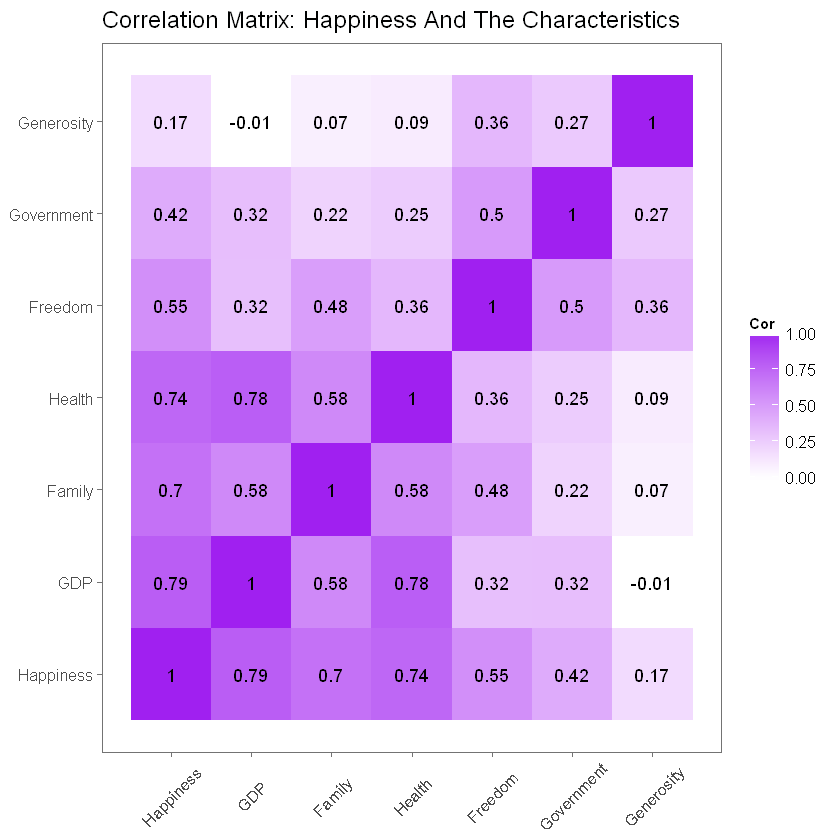

In [1000]:
df.cor = data.frame(index1=c(rep(1,7),rep(2,7),rep(3,7),rep(4,7),rep(5,7),rep(6,7),rep(7,7)), index2=rep(c(1:7),7), cor=as.numeric(cor(train[,c(5,7:12)]))) #Columns 5,7:12 are h.score, gdp, family, health, freedom, govt, generosity in this order

heat.cor=ggplot(df.cor, aes(x=index1, y=index2)) + geom_tile(aes(fill=cor)) + geom_text(aes(label=round(cor,2))) +theme_few() +labs(y=NULL,x=NULL, title="Correlation Matrix: Happiness And The Characteristics") + scale_fill_gradient(low="white", high="purple", name="Cor")  + scale_x_continuous(breaks=1:7,labels=c("Happiness", "GDP", "Family", "Health", "Freedom", "Government", "Generosity")) + scale_y_continuous(breaks=1:7, labels=c("Happiness", "GDP", "Family", "Health", "Freedom", "Government", "Generosity")) + theme(axis.text.x = element_text(angle=45, vjust=0.5)) + theme(legend.title=element_text(size=9, face="bold")) 

#First column (and first row) correspond to target
heat.cor

**Ignoring the first row and first column gives the correlation matrix for the six characteristics.*

We can see that with the exception of GDP and generosity, all of the variables are positively correlated in varying degrees. The largest correlation among the characteristics is 0.78 and occurs between GDP and health; in more prosperous countries people have better access to nutrition and health care, as well as a better education regarding these subjects. The two next largest coefficients among the six characteristics are only 0.58 and 0.48, so while the relationships among characteristics are somewhat linear, they are not strong enough to plausibly make multicollinearity a big issue in predicting happiness scores.

**Multivariate Analysis: *Two Characteristics Vs. Happiness***

For the first part of our multivariate analysis we will look at how pairs among the three most important characteristics - GDP, family and health - relate to happiness. The characteristics will be bucketed into intervals of length 0.2 so that appropriate heat maps can be constructed. Any characteristic value of 0 will by default be excluded from the buckets, as the first interval for each characteristic is (0,0.2], so we will update these buckets to include the 0 values.

In [994]:
breaks.gdp = cut(train$gdp, seq(0,2,0.2))   #A factor variable with levels "(0,0.2]", "(0.2,0.4]", ... , "(1.8,2]"
breaks.health = cut(train$health, seq(0,1.2,0.2))
breaks.family = cut(train$family, seq(0,1.6,0.2))   

#Update the level names so that 0 can be assigned to an appropriate interval
levels(breaks.gdp)[1]="[0,0.2]"   #Before the update this level is "(0,0.2]"
levels(breaks.health)[1]="[0,0.2]"
levels(breaks.family)[1]="[0,0.2]"

#The characteristic values that were 0 were replaced with NA because they did not fit in any interval before the level names were updated. Let's identify them so that we can manually update their intervals to "[0,0.2]".
which(is.na(breaks.gdp))
which(is.na(breaks.health))
which(is.na(breaks.family))

[1] 226

[1] 118 260

[1] 143 303

Now that we have identified the characteristics that have a value of 0 we can manually add in the [0,0.2] intervals for the 0 observations. We will then create the appropriate data frames of aggregated data that will allow us to construct our multivariate heat maps.

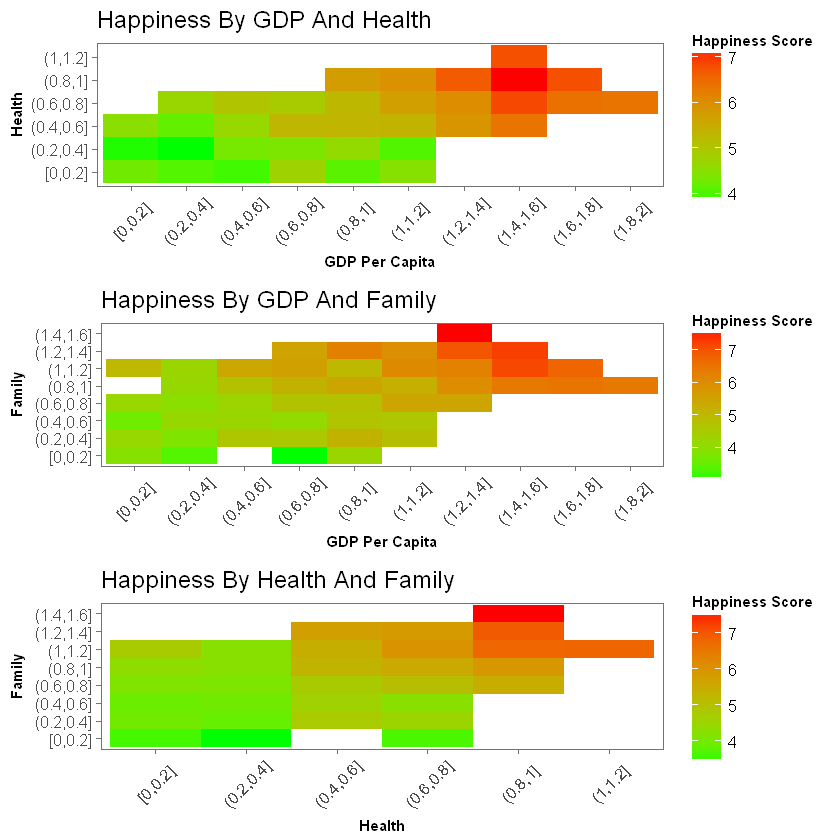

In [1001]:
breaks.gdp[226] = "[0,0.2]"
breaks.health[c(118,260)] = "[0,0.2]"
breaks.family[c(143,303)] = "[0,0.2]"

#Create the data frame from which the data will be aggregated.
breaks.df = data.frame(gdp = breaks.gdp, health=breaks.health, family=breaks.family, h.score=train$h.score, region=train$region)

#Creating the aggregated data frames
df.gdp.health = aggregate(h.score~gdp+health,data=breaks.df,mean)   #Takes the average happiness score for each (gdp,health) pair in breaks.
df.gdp.family = aggregate(h.score~gdp+family,data=breaks.df,mean)
df.health.family= aggregate(h.score~health+family,data=breaks.df,mean)

#Creating the heat maps
heat.gdp.health = ggplot(df.gdp.health, aes(x=gdp,y=health)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x="GDP Per Capita", y="Health", title="Happiness By GDP And Health") + scale_fill_gradient(name="Happiness Score", low="green", high="red") + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold"))

heat.gdp.family = ggplot(df.gdp.family, aes(x=gdp,y=family)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x="GDP Per Capita", y="Family", title="Happiness By GDP And Family") + scale_fill_gradient(name="Happiness Score", low="green", high="red") + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold"))

heat.health.family = ggplot(df.health.family, aes(x=health,y=family)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x="Health", y="Family", title="Happiness By Health And Family") + scale_fill_gradient(name="Happiness Score", breaks=3:7, low="green", high="red")  + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold")) 

#Display the graphs
grid.arrange(heat.gdp.health, heat.gdp.family, heat.health.family)

A common theme occurs amongst pairs of the top three characteristics in predicting happiness scores. There is the upwards-diagonal trend that when two of the three characteristic values are low the happiness score is low as well, and as they increase simultaneously, happiness rises until it reaches its peak near the top-right corner of the respective heat map, where the characteristic values are near their maximums. As can be seen in the heat maps above, we don't have access to any observations where the maximum bucket of any two of GDP, family and health occur. If we did it is plausible that it is at these observations, or at least near them, that happiness would be maximized. 

When building machine learning models one approach worth trying would be to feature engineer three new variables, each one corresponding to one of the pairs of the top three characteristics. Each feature could be constructed in such a way that it has a large value when both of its characteristics have large values, a small value when both of its characteristics have small values, and a value in between when one characteristic has a small value and the other is large. For example they can be summed, or more generally, any linear combination with positive coefficients can be constructed.

**Multivariate Analysis: *One Characteristic And Region Vs. Happiness***

Now let's see how happiness varies by region according to the values of the three most important characteristics.

Region,Abbreviation
Sub-Saharan Africa,SSA
Southern Asia,SA
Southeastern Asia,SEA
Central and Eastern Europe,CEE
Middle East and Northern Africa,MENA
Eastern Asia,EA
Latin America and Caribbean,LAC
Western Europe,WE
North America,NA
Australia and New Zealand,ANZ


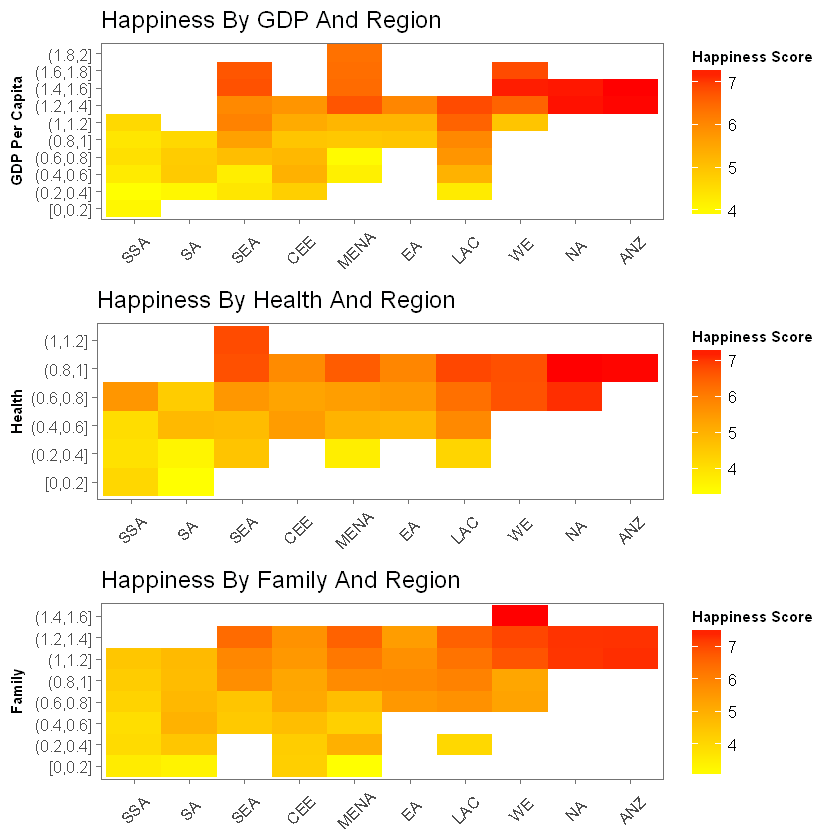

In [1002]:
#The regions in order of increasing h.score; we will use this to order our factors in the heat maps.
h.sort.region=c("Sub-Saharan Africa", "Southern Asia", "Southeastern Asia", "Central and Eastern Europe", "Middle East and Northern Africa", "Eastern Asia", "Latin America and Caribbean", "Western Europe", "North America", "Australia and New Zealand")

#Make a data frame that groups h.score by region and gdp
df.region.gdp = aggregate(h.score~region+gdp,data=breaks.df,mean)
df.region.gdp$region = factor(df.region.gdp$region, ordered=TRUE, levels=h.sort.region) #Convert region to type factor so that heat maps can be made

#Make a data frame that groups h.score by region and health
df.region.health = aggregate(h.score~region+health,data=breaks.df,mean)
df.region.health$region = factor(df.region.health$region, ordered=TRUE, levels=h.sort.region)

#Make a data frame that groups h.score by region and family
df.region.family = aggregate(h.score~region+family,data=breaks.df,mean)
df.region.family$region = factor(df.region.family$region, ordered=TRUE, levels=h.sort.region)

#Create the heat maps
heat.region.gdp = ggplot(df.region.gdp, aes(x=region,y=gdp)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x=NULL, y="GDP Per Capita", title="Happiness By GDP And Region") + scale_x_discrete(breaks=h.sort.region, labels=c("SSA", "SA", "SEA", "CEE", "MENA", "EA", "LAC", "WE", "NA", "ANZ")) + theme(axis.text.x = element_text(angle=45, vjust=0.5)) + scale_fill_gradient(name="Happiness Score", high="red", low="yellow") + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold")) 

heat.region.health = ggplot(df.region.health, aes(x=region,y=health)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x=NULL, y="Health", title="Happiness By Health And Region") + scale_x_discrete(breaks=h.sort.region, labels=c("SSA", "SA", "SEA", "CEE", "MENA", "EA", "LAC", "WE", "NA", "ANZ"))  + scale_fill_gradient(name="Happiness Score", high="red", low="yellow")   + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold")) 

heat.region.family = ggplot(df.region.family, aes(x=region,y=family)) + geom_tile(aes(fill=h.score)) + theme_few() + labs(x=NULL, y="Family", title="Happiness By Family And Region") + scale_x_discrete(breaks=h.sort.region, labels=c("SSA", "SA", "SEA", "CEE", "MENA", "EA", "LAC", "WE", "NA", "ANZ")) + theme(axis.text.x = element_text(angle=45)) + scale_fill_gradient(name="Happiness Score", high="red", low="yellow")  + theme(axis.text.x = element_text(angle=45, vjust=0.5), axis.title=element_text(size=9, face="bold"), legend.title=element_text(size=9, face="bold")) 

#Create abbreviated names for the regions that can be used for the plots (to save space)
legend = data.frame(Region=h.sort.region, Abbreviation = c("SSA", "SA", "SEA", "CEE", "MENA", "EA", "LAC", "WE", "NA", "ANZ"))
legend 

grid.arrange(heat.region.gdp, heat.region.health, heat.region.family)

We have already seen that there is a general upward trend in happiness for countries as any of GDP per capita, health quality or family quality increase. What we can see in the above heatmaps is that this trend exists not only globally but also within each region. In a machine learning project it would therefore be worth considering building a predictive model for each region, as we have seen throughout this project that there is a lot of variation between the different regions.

## Conclusion


Happiness matters. Its primary value is found not within the subjective enjoyment of the feeling itself but in the enthusiasm for creativity, production and problem-solving that it instills in people. We have seen that the national economy, family life, health quality, general freedom, generosity of citizens and trust in government are positively correlated with national happiness levels in varying degrees. GDP, health and family in particular show the strongest correlations with happiness; when a person is healthy, has tight personal relationships and is not perpetually burdened by finanacial concerns, then his or her views on life will likely be more optimistic. The need for all three of these factors to be ranked highly to ensure a high probabilty of happiness can be relaxed to a need for just two of them to be ranked highly to ensure a high probability of happiness. Prosperous countries with great health care, prosperous countries with great familial relationships, and countries with great health care and great familial relationships can expect the average citizen to report a high quality of life. It would therefore be wise that nations make it a priority to provide its citizens with the opportunities and support required to develop these crucial life pillars, and in return for their efforts, to reap the benefits on a national level.